<a href="https://colab.research.google.com/github/fivetop/romee/blob/main/TF_2_x_CNN_Example_4_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Basic CNN Architecture (2 Conv / 1 Flatten) 예제

1. 입력층 개념은 없애고, Conv2D(input_shape=(28,28,1), ...) 형태여야 한다

2. model.fit(), model.evaluate(), model.predict() 실행시킬때 입력데이터의 형변환을 reshape(-1, 28, 28, 1) 같이 tensor 로 해주어야 한다

3. 1st conv => 3 x 3 크기의 32 개 필터, padding 있음, 2 x 2 max pooling, 1stride

4. 2nd conv => 4 x 4 크기의 64 개 필터, padding 있음, 2 x 2 max pooling, 1stride

5. index_label_prediction_list 구현

In [1]:
import tensorflow as tf

from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist

import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt


In [2]:
(x_train, t_train), (x_test, t_test) = mnist.load_data()

x_train = x_train / 255.0
x_test = x_test / 255.0

print('x_train.shape = ', x_train.shape, ' , x_test.shape = ', x_test.shape)
print('t_train.shape = ', t_train.shape, ' , t_test.shape = ', t_test.shape)

11490434/11490434 [==============================] - 0s 0us/step
x_train.shape =  (60000, 28, 28)  , x_test.shape =  (10000, 28, 28)
t_train.shape =  (60000,)  , t_test.shape =  (10000,)


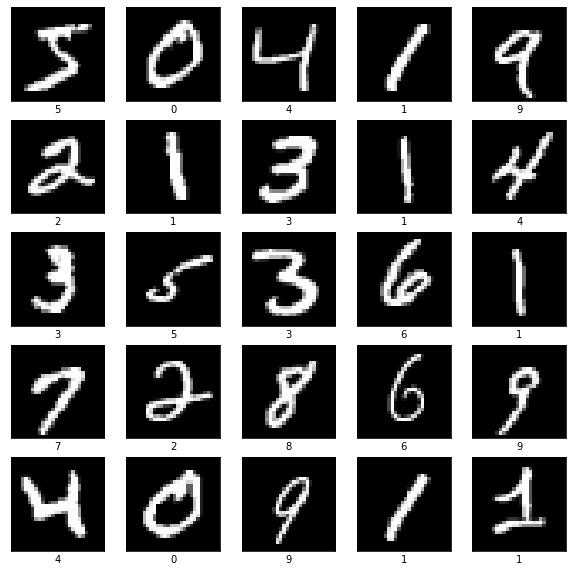

In [3]:
# 데이터 출력

plt.figure(figsize=(10,10))

for index in range(25):

    plt.subplot(5, 5, index+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[index], cmap='gray')
    plt.xlabel(str(t_train[index]))

plt.show()

In [4]:
# sequential model construction

# conv2D 계산 = 입력채널 32 * 필터 * 출력채널 + 바이어스 => 파라미터 

model = Sequential()

# 1st conv => 3 x 3 x 32 필터
model.add(Conv2D(input_shape=(28,28,1), kernel_size=3, filters=32, strides=(1,1), activation='relu', use_bias=True, padding='SAME'))

# 1st pooling
model.add(MaxPooling2D(pool_size=(2,2), padding='SAME'))

# 2nd conv => 4 x 4 x 64 필터
model.add(Conv2D(kernel_size=4, filters=64, strides=(1,1), activation='relu', use_bias=True, padding='SAME'))

# 2nd pooling
model.add(MaxPooling2D(pool_size=(2,2), padding='SAME'))

model.add(Flatten())

model.add(Dense(10, activation='softmax'))

In [5]:
# model compile
# one hot encoding 방식이 아니기 때문에, loss=sparse_categorical_crossentropy 정의

model.compile(optimizer=Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        32832     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 10)                3

In [7]:
# model shape 확인

print(model.input_shape, model.output_shape)

(None, 28, 28, 1) (None, 10)


In [8]:
# 원래 x_train, x_test 의 shape(차원) 은 (이미지 수, 28, 28) 의 3차원 데이터.
# 이것을 4차원으로 바꾸기 위해 reshape() 을 사용함.
# 가장 처음의 -1 은 batch_size 에 지정된 데이터가 한번에 오는것임.

start_time = datetime.now()

hist = model.fit(x_train.reshape(-1,28,28,1), t_train, batch_size=50, epochs=50, validation_split=0.2)

end_time = datetime.now()

print('\n\nElapsed Time => ', end_time - start_time)

Epoch 1/50
960/960 [==============================] - 12s 4ms/step - loss: 0.1844 - accuracy: 0.9436 - val_loss: 0.0667 - val_accuracy: 0.9789
Epoch 2/50
960/960 [==============================] - 3s 3ms/step - loss: 0.0553 - accuracy: 0.9831 - val_loss: 0.0588 - val_accuracy: 0.9815
Epoch 3/50
960/960 [==============================] - 3s 3ms/step - loss: 0.0396 - accuracy: 0.9874 - val_loss: 0.0464 - val_accuracy: 0.9870
Epoch 4/50
960/960 [==============================] - 4s 4ms/step - loss: 0.0300 - accuracy: 0.9903 - val_loss: 0.0357 - val_accuracy: 0.9882
Epoch 5/50
960/960 [==============================] - 3s 4ms/step - loss: 0.0227 - accuracy: 0.9923 - val_loss: 0.0390 - val_accuracy: 0.9887
Epoch 6/50
960/960 [==============================] - 3s 3ms/step - loss: 0.0178 - accuracy: 0.9940 - val_loss: 0.0396 - val_accuracy: 0.9883
Epoch 7/50
960/960 [==============================] - 3s 4ms/step - loss: 0.0137 - accuracy: 0.9955 - val_loss: 0.0420 - val_accuracy: 0.9886
Epoch

In [ ]:
# x_test 도 마찬가지로 데이터를 4차원으로 reshape 으로 변환 해주지 않으면 error

model.evaluate(x_test.reshape(-1,28,28,1), t_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0643 - accuracy: 0.9902


[0.06431673467159271, 0.9901999831199646]

In [ ]:
# index_label_prediction 코드 구현

ret_val = model.predict(x_test.reshape(-1,28,28,1))

print('type(ret_val) = ', type(ret_val), ', ret_val.shape = ', ret_val.shape)

# predict 실행 결과는 softmax 에 의한 확률 결과이므로, argmax 이용해서 10진수로 바꾸어 주어야함

predicted_val = np.argmax(ret_val, axis=1)  # 행 단위로 argmax 실행

prediction_label_comp_val = np.equal(predicted_val, t_test)

# list comprehension 이용하여 index_label_prediction 구현

index_label_prediction_list = [ [index, t_test[index], predicted_val[index] ]  for index, result in enumerate(prediction_label_comp_val)  if result == False ]

print(len(index_label_prediction_list))

print('Accuracy = ', 1 - ( len(index_label_prediction_list) / len(t_test) ))

type(ret_val) =  <class 'numpy.ndarray'> , ret_val.shape =  (10000, 10)
98
Accuracy =  0.9902


In [ ]:
print(index_label_prediction_list)

[[87, 3, 7], [211, 5, 3], [340, 5, 3], [582, 8, 2], [646, 2, 1], [659, 2, 1], [720, 5, 8], [958, 3, 2], [1014, 6, 5], [1039, 7, 2], [1112, 4, 6], [1206, 7, 1], [1232, 9, 4], [1247, 9, 5], [1260, 7, 1], [1319, 8, 0], [1364, 8, 2], [1393, 5, 3], [1414, 9, 7], [1621, 0, 6], [1709, 9, 5], [1790, 2, 7], [1901, 9, 4], [2035, 5, 3], [2043, 4, 8], [2070, 7, 9], [2118, 6, 0], [2129, 9, 8], [2130, 4, 9], [2135, 6, 1], [2185, 0, 8], [2189, 9, 1], [2280, 3, 5], [2293, 9, 4], [2329, 0, 2], [2369, 5, 8], [2406, 9, 4], [2414, 9, 4], [2437, 2, 1], [2447, 4, 9], [2578, 7, 2], [2582, 9, 5], [2597, 5, 3], [2654, 6, 1], [2720, 9, 4], [2743, 5, 8], [2930, 5, 1], [2938, 4, 9], [2939, 9, 5], [2953, 3, 5], [2995, 6, 8], [3060, 9, 3], [3225, 7, 1], [3520, 6, 4], [3534, 4, 8], [3558, 5, 0], [3662, 8, 6], [3727, 8, 9], [3742, 3, 8], [3762, 6, 8], [3808, 7, 8], [4163, 9, 7], [4176, 2, 7], [4201, 1, 4], [4238, 7, 3], [4284, 9, 5], [4289, 2, 7], [4297, 7, 1], [4360, 5, 3], [4500, 9, 1], [4575, 4, 2], [4740, 3, 5], 

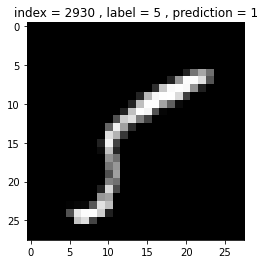

In [ ]:
# 임의의 false prediction 이미지 출력

false_data_index = np.random.randint(len(index_label_prediction_list))

#print('len of index_label_prediction_list => ', len(index_label_prediction_list), ', false_data_index => ', false_data_index)

mnist_index = index_label_prediction_list[false_data_index][0]
label = index_label_prediction_list[false_data_index][1]
prediction = index_label_prediction_list[false_data_index][2]

title_str = 'index = ' + str(mnist_index) + ' , label = ' + str(label) + ' , prediction = ' + str(prediction)

img = x_test[mnist_index].reshape(28,28)


plt.title(title_str)
plt.imshow(img, cmap='gray')
plt.show()